# Sparta Global ETL Project – Visualisations

This notebook contains visualisations using the cleaned Talent and Academy data.
Data is pulled directly from S3 using Boto3 and analysed with Pandas, Matplotlib, and Seaborn.

In [1]:
# Import necessary libraries
import pandas as pd
import boto3
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from AWS S3

We use a helper function to pull CSVs directly from the S3 bucket.

In [2]:
def load_csv_from_s3(bucket_name, key):
    s3_client = boto3.client('s3')
    response = s3_client.get_object(Bucket=bucket_name, Key=key)
    content = response['Body'].read().decode('utf-8')
    return pd.read_csv(StringIO(content))

In [3]:
# Define the S3 bucket and base folder
BUCKET = 'data-504-final-project-v2'
TRANSFORMED_PATH = 'Transformed/'

# Load transformed CSVs
address = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'address.csv')
candidate = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'candidate.csv')
candidate_strength = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'candidate_strength.csv')
candidate_tech_skill = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'candidate_tech_skill.csv')
candidate_university = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'candidate_university.csv')
candidate_weakness = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'candidate_weakness.csv')
cohort = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'cohort.csv')
course = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'course.csv')
interview = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'interview.csv')
invitation = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'invitation.csv')
score = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'score.csv')
skill = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'skill.csv')
sparta_day = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'sparta_day.csv')
strength = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'strength.csv')
student = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'student.csv')
talent_member = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'talent_member.csv')
tech_skill = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'tech_skill.csv')
trainer = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'trainer.csv')
university = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'university.csv')
weakness = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'weakness.csv')
week = load_csv_from_s3(BUCKET, TRANSFORMED_PATH + 'week.csv')

## Preview the Data

Always check that the data loaded correctly before visualising.

In [4]:
# Preview a few key transformed datasets
interview.head()

,interview_id,candidate_id,interview_date,course_interest,geo_flex,self_development,financial_support_self,interview_result
0,1,380,2019-08-22,Business,True,True,Yes,True
1,2,381,2019-08-01,Data,True,False,Yes,False
2,3,382,2019-08-22,Business,True,True,Yes,True
3,4,383,2019-08-28,Data,True,True,Yes,True
4,5,387,2019-08-07,Engineering,True,True,Yes,True


In [5]:
student.head()

,candidate_id,cohort_id,first_name,last_name
0,380,11,Stillmann,Castano
1,382,11,Efrem,Whipple
2,383,23,Sydel,Fenne
3,387,36,Michel,Lebarree
4,393,23,Gavin,Lambregts


In [29]:
candidate.head()

,candidate_id,candidate_first_name,candidate_last_name,email,phone_number,date_of_birth,gender,address_id
0,1,Esme,Trusslove,etrusslove0@google.es,+442957830228,1994-08-04,Female,1032
1,2,Matthaeus,Audas,maudas1@mapquest.com,+449577280155,NaN,Male,1178
2,3,Cherey,Tollfree,ctollfree2@netvibes.com,+445887496002,1992-12-08,Female,3151
3,4,Eryn,Speers,espeers3@shinystat.com,+441487870613,NaN,Female,158
4,5,Theadora,Berkelay,tberkelay4@godaddy.com,+448414683619,1995-11-03,Female,2755


In [7]:
cohort.head()

,cohort_id,trainer_id,course_id,start_date
0,1,7,1,2019-02-11
1,2,1,1,2019-03-18
2,3,7,1,2019-04-15
3,4,15,1,2019-05-20
4,5,16,1,2019-07-15


In [19]:
talent_member.head()

,talent_member_first_name,talent_member_last_name,talent_member_id
0,Bruno,Bellbrook,1
1,Doris,Bellasis,2
2,Fifi,Etton,3
3,Gismo,Tilling,4
4,Rupert,Ripple,5


In [8]:
sparta_day.head()

,event_date,academy,presentation_result,psychometric_result,candidate_id
0,2019-08-01,Birmingham Academy,19,51,381
1,2019-08-01,Birmingham Academy,19,51,390
2,2019-08-01,Birmingham Academy,16,55,424
3,2019-08-01,Birmingham Academy,21,59,426
4,2019-08-01,Birmingham Academy,25,66,429


## How many candidates were invited per month?

This line chart shows how many candidates were invited to a Sparta Day each month. 
Note: One row with a missing invitation date is excluded.

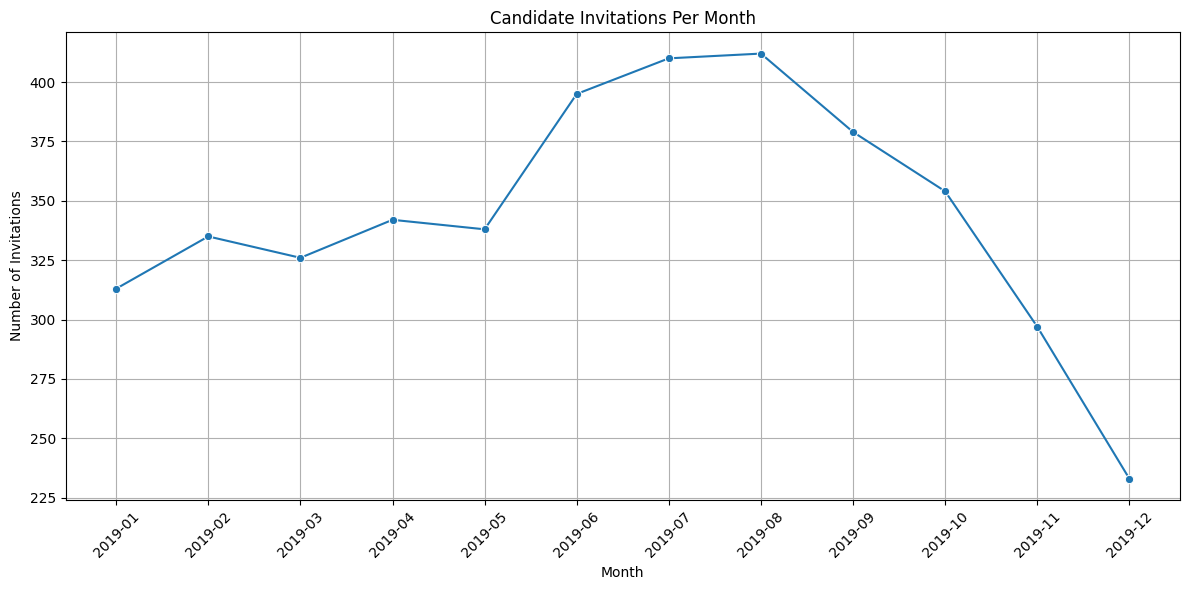

In [9]:
# Convert to datetime
invitation['invitation_date'] = pd.to_datetime(invitation['invitation_date'], errors='coerce')

# Drop invalid dates (e.g. NaT)
monthly_invites = (
    invitation.dropna(subset=['invitation_date'])
    .assign(month=lambda df: df['invitation_date'].dt.to_period('M').astype(str))
    .groupby('month')
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_invites, x='month', y='count', marker='o')
plt.title('Candidate Invitations Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Invitations')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Pass vs Fail rate across all interviews

This pie chart shows the pass vs fail breakdown for all interviews in the dataset.

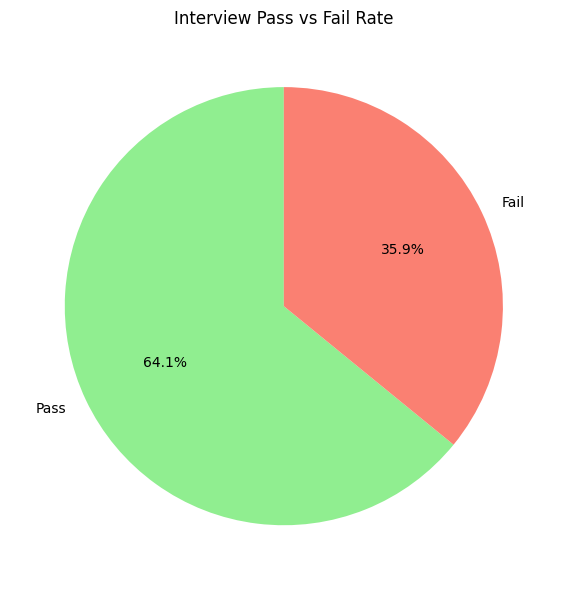

In [10]:
# Clean and map
interview = interview.dropna(subset=['interview_result'])
interview['interview_result'] = interview['interview_result'].map({True: 'Pass', False: 'Fail'})

# Count
interview_outcome = interview['interview_result'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(interview_outcome, labels=interview_outcome.index, autopct='%1.1f%%',
        colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Interview Pass vs Fail Rate')
plt.tight_layout()
plt.show()

## Course Interest Popularity

This bar chart shows which courses candidates were most interested in after their Sparta Day interview.
It helps identify which areas attracted the most candidate interest.

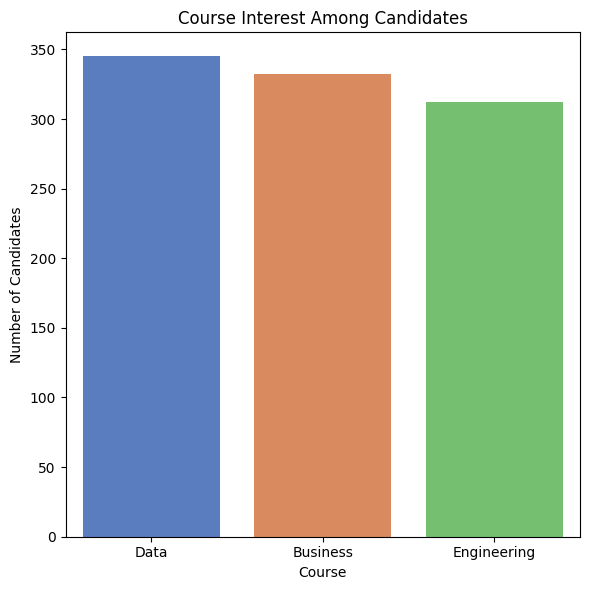

In [11]:
# Count course interest values
course_counts = interview['course_interest'].value_counts().reset_index()
course_counts.columns = ['Course', 'Count']

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(data=course_counts, x='Course', y='Count', hue='Course', palette='muted', legend=False)
plt.title('Course Interest Among Candidates')
plt.xlabel('Course')
plt.ylabel('Number of Candidates')
plt.tight_layout()
plt.show()

## Gender breakdown of candidates

This pie chart displays the gender distribution of all candidates in the dataset.

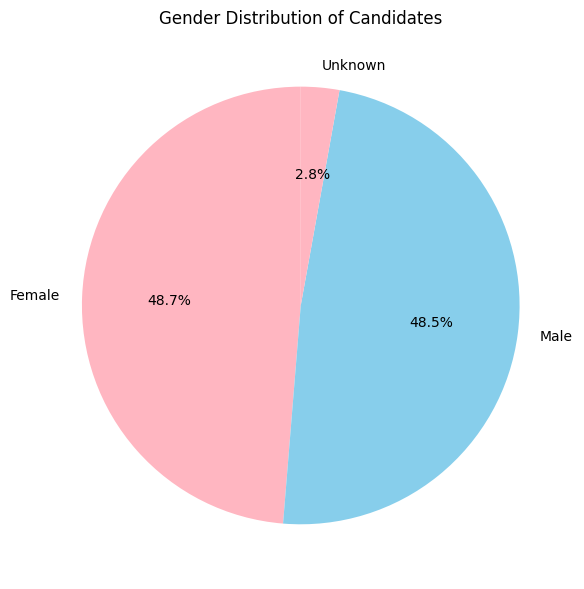

In [12]:
# Clean gender
candidate['gender'] = candidate['gender'].str.title()

# Count
gender_counts = candidate['gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFB6C1', '#87CEEB'])
plt.title('Gender Distribution of Candidates')
plt.tight_layout()
plt.show()

## Comparison of Psychometric and Presentation Scores

This visualisation compares the distribution of psychometric and presentation scores from Sparta Day assessments. 
Displaying the histograms vertically improves readability and makes it easier to compare spread and patterns.

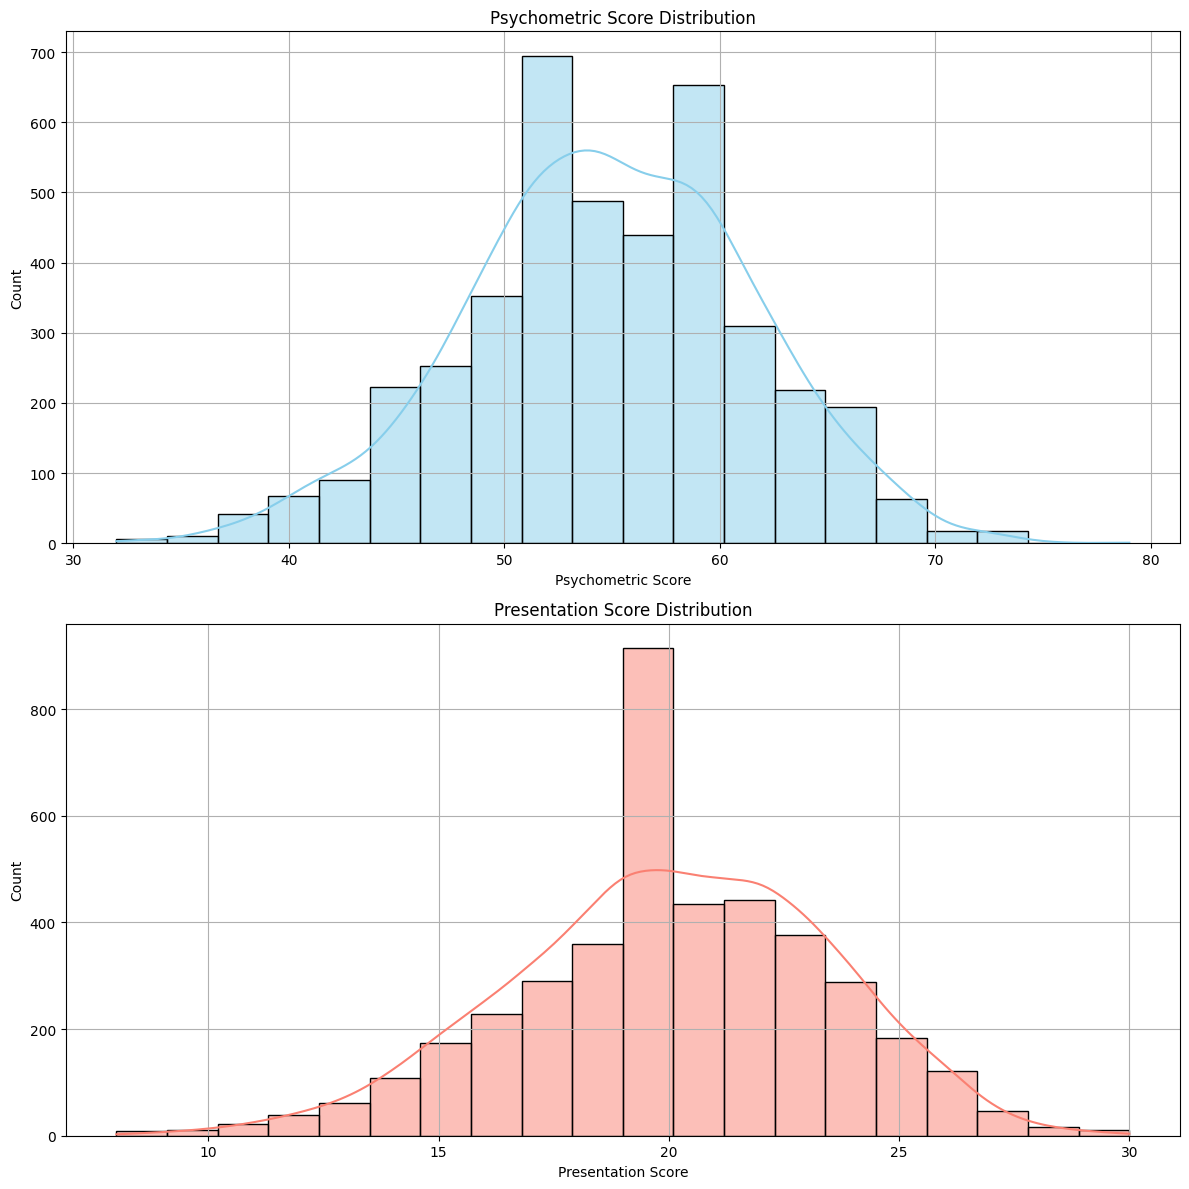

In [13]:
# Drop missing values for clean distribution
scores = sparta_day[['psychometric_result', 'presentation_result']].dropna()

# Plot
plt.figure(figsize=(12, 12))

# Psychometric
plt.subplot(2, 1, 1)
sns.histplot(scores['psychometric_result'], kde=True, bins=20, color='skyblue')
plt.title('Psychometric Score Distribution')
plt.xlabel('Psychometric Score')
plt.grid(True)
plt.ylabel('Count')

# Presentation
plt.subplot(2, 1, 2)
sns.histplot(scores['presentation_result'], kde=True, bins=20, color='salmon')
plt.title('Presentation Score Distribution')
plt.xlabel('Presentation Score')
plt.grid(True)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Which Talent Members Brought in the Best Performing Candidates?

This chart shows average self-scores by candidates per talent member, helping identify who refers high-performing individuals.

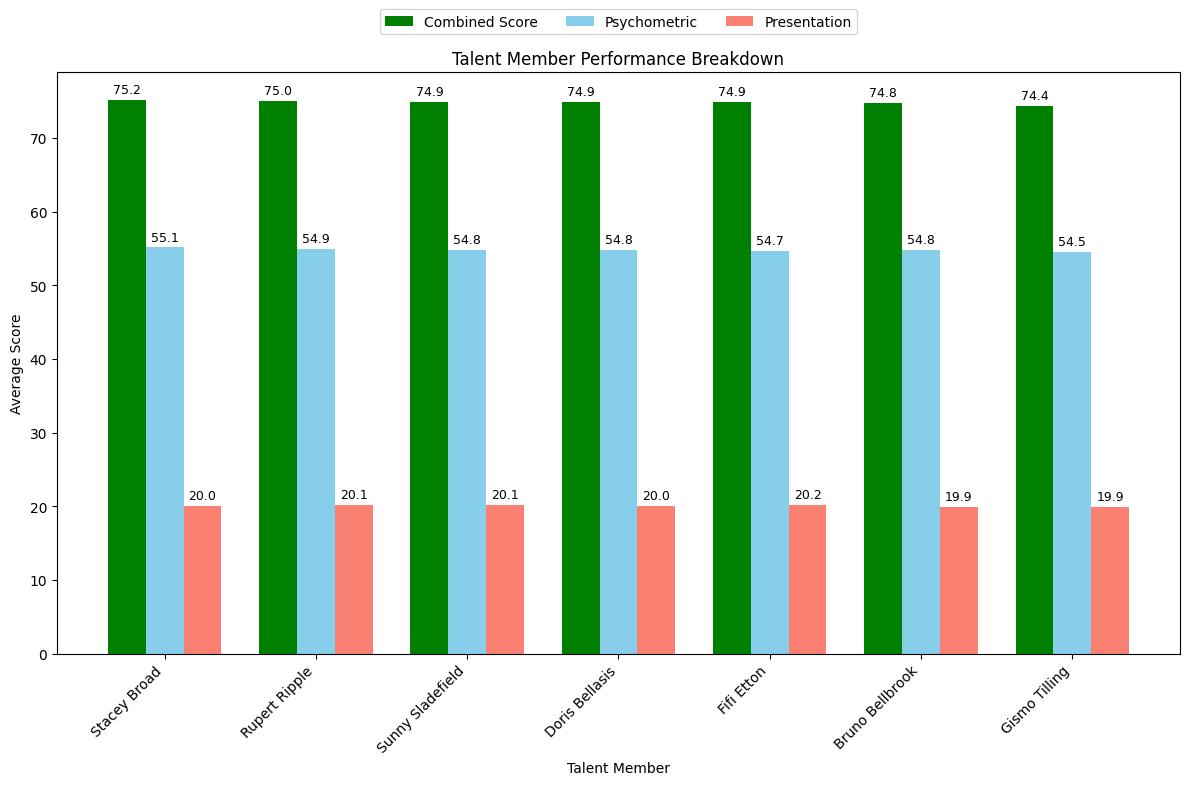

In [33]:
# Merge Sparta Day and Invitation to get candidate scores + talent member info
merged = invitation.merge(sparta_day, on='candidate_id', how='inner')
merged = merged.merge(talent_member, on='talent_member_id', how='left')

# Create full name
merged['talent_member'] = merged['talent_member_first_name'] + ' ' + merged['talent_member_last_name']

# Group by talent member and calculate averages
score_summary = merged.groupby('talent_member')[['psychometric_result', 'presentation_result']].mean().reset_index()

# Add combined score
score_summary['combined_score'] = score_summary['psychometric_result'] + score_summary['presentation_result']

# Sort by combined score
score_summary = score_summary.sort_values(by='combined_score', ascending=False)

# Plot setup
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = range(len(score_summary))

# Bar plots
bars_combined = plt.bar(index, score_summary['combined_score'], bar_width, label='Combined Score', color='green')
bars_psych = plt.bar([i + bar_width for i in index], score_summary['psychometric_result'], bar_width, label='Psychometric', color='skyblue')
bars_pres = plt.bar([i + 2 * bar_width for i in index], score_summary['presentation_result'], bar_width, label='Presentation', color='salmon')

# Axis labels and ticks
plt.xlabel('Talent Member')
plt.ylabel('Average Score')
plt.title('Talent Member Performance Breakdown')
plt.xticks([i + bar_width for i in index], score_summary['talent_member'], rotation=45, ha='right')

# Legend: move above chart
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=3)

# Annotate bar values
for bar_group in [bars_combined, bars_psych, bars_pres]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()